In [1]:
import keras

In [ ]:
import torch

In [2]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Yash
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
basepath = './data/aclImdb'
dir_list = os.listdir(basepath)
dir_list

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [5]:
#creating an empty train dataframe
df_train = pd.DataFrame(columns=['Review','Polarity'])

#creating an empty test dataframe
df_test = pd.DataFrame(columns=['Review','Polarity'])

In [6]:
#Reading the reviews from files from in the directory and saving them in the train and test dataframes along with polarity.
df_index = 0
for superfolder in dir_list:
    if superfolder== 'test' or superfolder== 'train':
        subsuperfolder = os.listdir(basepath+'/'+superfolder)
        for subsuperfolder in subsuperfolder:
            if subsuperfolder == 'neg' or subsuperfolder =='pos':
                file_list = os.listdir(basepath+'/'+superfolder+'/'+subsuperfolder)
                for subfile in file_list:
                    fdata = open(basepath+'/'+superfolder+'/'+subsuperfolder+'/'+subfile, encoding="utf8")
                    if superfolder == 'train':
                        if subsuperfolder == 'neg':
                            df_train = df_train.append({'Review': fdata.read(), 'Polarity': 0}, ignore_index=True)
                        else:
                            df_train = df_train.append({'Review': fdata.read(), 'Polarity': 1}, ignore_index=True)
                    else:
                        if subsuperfolder == 'neg':
                            df_test = df_test.append({'Review': fdata.read(), 'Polarity': 0}, ignore_index=True)
                        else:
                            df_test = df_test.append({'Review': fdata.read(), 'Polarity': 1}, ignore_index=True)

In [7]:
df_train.head()

,Review,Polarity
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


In [8]:
df_test.head()

,Review,Polarity
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


Sentiment of 0 is 50 % of total
Sentiment of 1 is 50 % of total


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

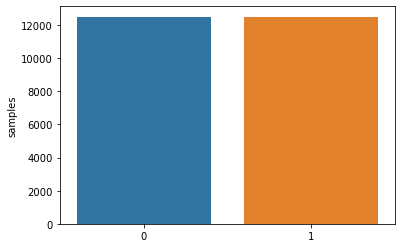

In [9]:
#Checking if no of reviews are same for pos and neg

print('Sentiment of 0 is {} % of total'.format(round(df_train['Polarity'].value_counts()[0]/len(df_train['Polarity'])*100)))
print('Sentiment of 1 is {} % of total'.format(round(df_train['Polarity'].value_counts()[1]/len(df_train['Polarity'])*100)))
x=df_train.Polarity.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [10]:
df_train.Review

0        Story of a man who has unnatural feelings for ...
1        Airport '77 starts as a brand new luxury 747 p...
2        This film lacked something I couldn't put my f...
3        Sorry everyone,,, I know this is supposed to b...
4        When I was little my parents took me along to ...
                               ...                        
24995    Seeing as the vote average was pretty low, and...
24996    The plot had some wretched, unbelievable twist...
24997    I am amazed at how this movie(and most others ...
24998    A Christmas Together actually came before my t...
24999    Working-class romantic drama from director Mar...
Name: Review, Length: 25000, dtype: object

## Pre Processing

#### Using Regex

In [11]:
#Removing unwanted words to convert a document to a sequence of words which are more useful to determine sentiment
#Removing special characters and numbers from the reviews

import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\*)|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NON_LETTERS = re.compile("[^a-zA-Z]")
NO_SPACE = ""
SPACE = " "

def review_to_words(review, string = True, remove_stopwords=True):
    
    review = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in review]
    review = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in review]
    review = [NON_LETTERS.sub(SPACE, line) for line in review]  
    return review

In [12]:
# Get list of reviews
clean_train_reviews = review_to_words(df_train.Review)
clean_test_reviews = review_to_words(df_test.Review)

In [13]:
clean_train_reviews[0]

'story of a man who has unnatural feelings for a pig starts out with a opening scene that is a terrific example of absurd comedy a formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting even those from the era should be turned off the cryptic dialogue would make shakespeare seem easy to a third grader on a technical level its better than you might think with some good cinematography by future great vilmos zsigmond future stars sally kirkland and frederic forrest can be seen briefly'

In [14]:
df_train = df_train.drop(columns='Review')

In [15]:
df_test = df_test.drop(columns='Review')

In [16]:
df_train.insert(0,'Review', clean_train_reviews)

In [17]:
df_test.insert(0,'Review', clean_test_reviews)

In [18]:
print(df_train)

                                                  Review Polarity
0      story of a man who has unnatural feelings for ...        0
1      airport  starts as a brand new luxury  plane i...        0
2      this film lacked something i couldnt put my fi...        0
3      sorry everyone i know this is supposed to be a...        0
4      when i was little my parents took me along to ...        0
...                                                  ...      ...
24995  seeing as the vote average was pretty low and ...        1
24996  the plot had some wretched unbelievable twists...        1
24997  i am amazed at how this movieand most others h...        1
24998  a christmas together actually came before my t...        1
24999  working class romantic drama from director mar...        1

[25000 rows x 2 columns]


#### Stopwords Removal
Now, let's get rid of the stopwords i.e words which occur very frequently and have possible value like a, an, the, are etc.

In [19]:
stopword = set(stopwords.words("english"))

for i in range(0,25000) : 
    review = df_train.iloc[i,0] # review column : 0
    review = review.lower().split()
    words = [r for r in review if not r in stopword]
    clean_review = ' '.join(words)
    df_train.iloc[i,0] = clean_review

for i in range(0,25000) : 
    review = df_test.iloc[i,0] # review column : 0
    review = review.lower().split()
    words = [r for r in review if not r in stopword]
    clean_review = ' '.join(words)
    df_test.iloc[i,0] = clean_review
    
df_train.head()

,Review,Polarity
0,story man unnatural feelings pig starts openin...,0
1,airport starts brand new luxury plane loaded v...,0
2,film lacked something couldnt put finger first...,0
3,sorry everyone know supposed art film wow hand...,0
4,little parents took along theater see interior...,0


#### Shuffle the data

<b> Shuffling the data so that the neg and pos polarities are not in order and get mixed </b>

In [20]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [21]:
df_train.head()

,Review,Polarity
0,main reason writing review found revisioning g...,0
1,watched tape immediately rewound watched laugh...,1
2,awards show please people clearly favorite mov...,1
3,let state first love westerns civil war storie...,0
4,seen friends writing feel familiar especially ...,0


In [22]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [23]:
df_test.head()

,Review,Polarity
0,first foremost gay man although live life with...,0
1,barbara stanwyck probably didnt think relief s...,1
2,saw borderline several years ago amc ive looki...,1
3,fan time travel stories surprised device sent ...,1
4,looked cool movie sleeve five minutes werent s...,0


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(df_train['Review'])
X_train = cv.transform(df_train['Review'])
X_test = cv.transform(df_test['Review'])


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y_train = df_train['Polarity']
y_train = y_train.astype('int')

#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state=42)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(df_test['Polarity'].astype('int'), lr.predict(X_test))))

Accuracy for C=0.01: 0.87524
Accuracy for C=0.05: 0.8796


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.25: 0.87396


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.8706
Accuracy for C=1: 0.86692


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
import sys
sys.path.append("/some/path/to/add")

import torchtext

ModuleNotFoundError: No module named 'torchtext'

In [ ]:
import torch
from torchtext.legacy import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy',
                  tokenizer_language = 'en_core_web_sm')
LABEL = data.LabelField(dtype = torch.float)